In [1]:
file_path = 'data/url-shortner/usagov_bitly_data2012-03-16-1331923249.txt'

In [27]:
from json import loads
from pandas import DataFrame
import numpy as np

In [3]:
lines = []
file = open(file_path)
for line in file:
    lines.append(loads(line))

In [4]:
d1 = DataFrame(lines)
d1

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [9]:
s1 = d1['tz']
s2 = s1[(s1 == '') | (s1.isnull())]
s2

7          
8          
9          
13      NaN
28         
       ... 
3518    NaN
3531       
3536       
3543    NaN
3551       
Name: tz, Length: 641, dtype: object

# Missing data treatment - Not ignore and put all the empty tz entries into a 'Missing' timezone

In [11]:
s3 = s1.fillna('Missing')
s3

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [12]:
s3[(s3 == '') | (s3.isnull())]

7        
8        
9        
28       
29       
       ..
3512     
3513     
3531     
3536     
3551     
Name: tz, Length: 521, dtype: object

In [13]:
s3[s3 == ''] = 'Missing'

In [14]:
s3[(s3 == '') | (s3.isnull())]

Series([], Name: tz, dtype: object)

In [16]:
s3.iloc[:20]

0        America/New_York
1          America/Denver
2        America/New_York
3       America/Sao_Paulo
4        America/New_York
5        America/New_York
6           Europe/Warsaw
7                 Missing
8                 Missing
9                 Missing
10    America/Los_Angeles
11       America/New_York
12       America/New_York
13                Missing
14       America/New_York
15         Asia/Hong_Kong
16         Asia/Hong_Kong
17       America/New_York
18         America/Denver
19            Europe/Rome
Name: tz, dtype: object

In [18]:
d1['tz'] = s3
d1.head(20)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,axNK8c,axNK8c,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273673e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
6,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,PL,0.0,Europe/Warsaw,77,wcndER,zkpJBR,bnjacobs,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://plus.url.google.com/url?sa=z&n=13319232...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,Luban,"[51.116699, 15.2833]",NaN,NaN
7,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,None,0.0,Missing,NaN,wcndER,zkpJBR,bnjacobs,"bg,en-us;q=0.7,en;q=0.3",1.usa.gov,http://www.facebook.com/,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
8,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,None,0.0,Missing,NaN,wcndER,zkpJBR,bnjacobs,"en-US, en",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
9,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,None,0.0,Missing,NaN,zCaLwp,zUtuOu,alelex88,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://t.co/o1Pd0WeV,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN


# Top 10 timezones that use url shortening frequently

In [19]:
d1['tz'].unique()

array(['America/New_York', 'America/Denver', 'America/Sao_Paulo',
       'Europe/Warsaw', 'Missing', 'America/Los_Angeles',
       'Asia/Hong_Kong', 'Europe/Rome', 'Africa/Ceuta', 'Europe/Madrid',
       'Asia/Kuala_Lumpur', 'Asia/Nicosia', 'Europe/London',
       'Pacific/Honolulu', 'America/Chicago', 'Europe/Malta',
       'Europe/Lisbon', 'Europe/Paris', 'Europe/Copenhagen',
       'America/Mazatlan', 'Europe/Dublin', 'Europe/Brussels',
       'America/Vancouver', 'Europe/Amsterdam', 'Europe/Prague',
       'Europe/Stockholm', 'America/Anchorage', 'Asia/Bangkok',
       'Europe/Berlin', 'America/Rainy_River', 'Europe/Budapest',
       'Asia/Tokyo', 'Europe/Vienna', 'America/Phoenix', 'Asia/Jerusalem',
       'Asia/Karachi', 'America/Bogota', 'America/Indianapolis',
       'America/Montreal', 'Asia/Calcutta', 'Europe/Skopje',
       'Asia/Beirut', 'Australia/NSW', 'Chile/Continental',
       'America/Halifax', 'America/Edmonton', 'Europe/Bratislava',
       'America/Recife', 'Africa/

In [20]:
d2 = d1['tz']
d2

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [22]:
d3 = d2.value_counts()
d4 = d3.head(10)
d4

America/New_York       1251
Missing                 641
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

<AxesSubplot:>

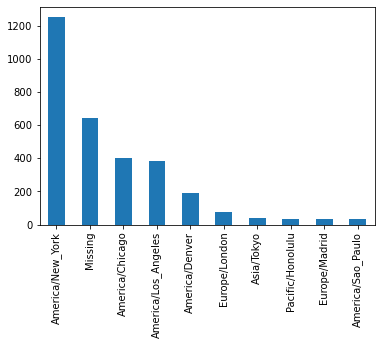

In [23]:
d4.plot(kind='bar')

# Top 10 timezones using url shortening frequently; grouped by Operating system

In [24]:
d1

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [29]:
d5 = np.where(d1['a'].str.contains('Windows'), 'Windows', 'Non-Windows')
d5[:10]

array(['Windows', 'Non-Windows', 'Windows', 'Non-Windows', 'Windows',
       'Windows', 'Windows', 'Windows', 'Non-Windows', 'Windows'],
      dtype='<U11')

In [31]:
d1['os'] = d5
d1[['a', 'os']]

,a,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows
1,GoogleMaps/RochesterNY,Non-Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,Non-Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Windows
...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,Windows
3557,GoogleMaps/RochesterNY,Non-Windows
3558,GoogleProducer,Non-Windows


In [32]:
d6 = d1[['tz', 'os']]
d6

,tz,os
0,America/New_York,Windows
1,America/Denver,Non-Windows
2,America/New_York,Windows
3,America/Sao_Paulo,Non-Windows
4,America/New_York,Windows
...,...,...
3555,America/New_York,Windows
3556,America/Chicago,Windows
3557,America/Denver,Non-Windows
3558,America/Los_Angeles,Non-Windows


In [33]:
d6['t'] = 1
d6

<ipython-input-33-7d6648cc140a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d6['t'] = 1


,tz,os,t
0,America/New_York,Windows,1
1,America/Denver,Non-Windows,1
2,America/New_York,Windows,1
3,America/Sao_Paulo,Non-Windows,1
4,America/New_York,Windows,1
...,...,...,...
3555,America/New_York,Windows,1
3556,America/Chicago,Windows,1
3557,America/Denver,Non-Windows,1
3558,America/Los_Angeles,Non-Windows,1


In [35]:
d7 = d6.pivot_table('t', aggfunc='sum', index='tz', columns=['os'])
d8 = d7.fillna(0)
d8

os,Non-Windows,Windows
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
...,...,...
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0
Missing,245.0,396.0


In [36]:
d9 = d8.loc[d4.index]
d9

os,Non-Windows,Windows
America/New_York,339.0,912.0
Missing,245.0,396.0
America/Chicago,115.0,285.0
America/Los_Angeles,130.0,252.0
America/Denver,132.0,59.0
Europe/London,43.0,31.0
Asia/Tokyo,2.0,35.0
Pacific/Honolulu,0.0,36.0
Europe/Madrid,16.0,19.0
America/Sao_Paulo,13.0,20.0


<AxesSubplot:>

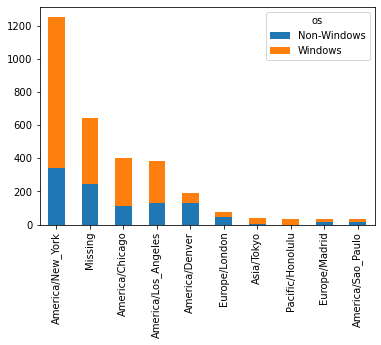

In [39]:
d9.plot(kind='bar', stacked=True)